Missing Values:
 latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


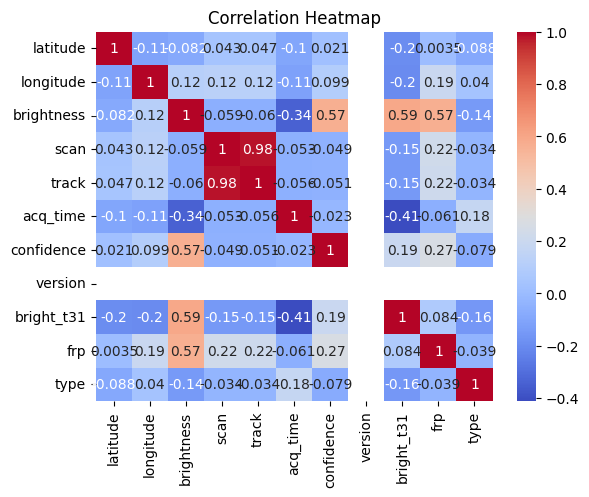

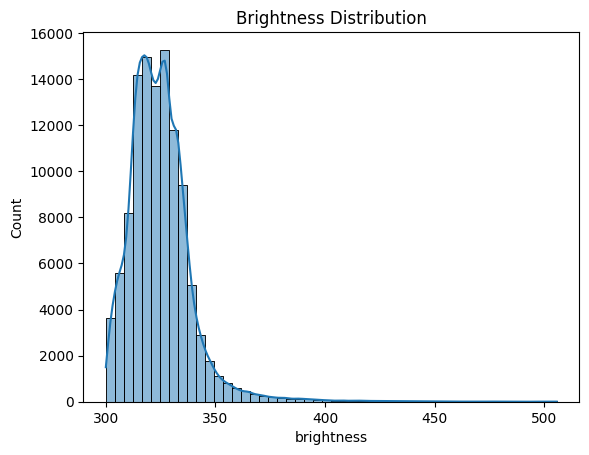

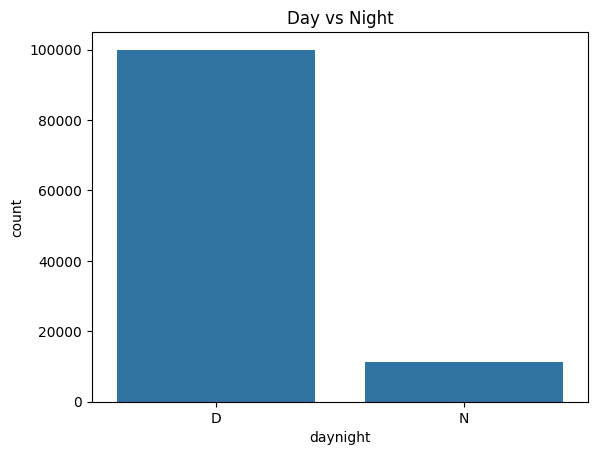

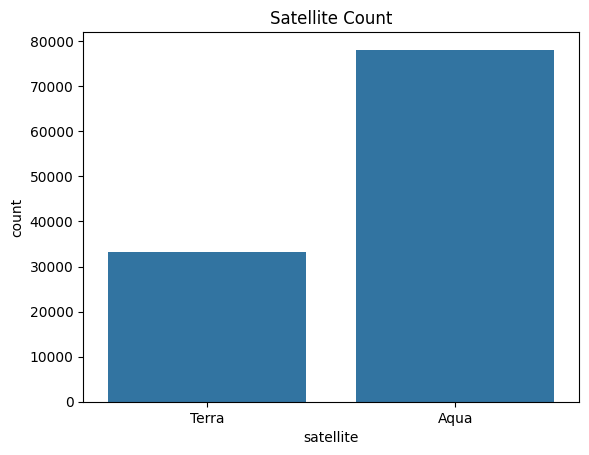

Accuracy: 0.9848117192414847
Confusion Matrix:
 [[21325    28     0]
 [  304   591     0]
 [    6     0     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     21353
           2       0.95      0.66      0.78       895
           3       0.00      0.00      0.00         6

    accuracy                           0.98     22254
   macro avg       0.65      0.55      0.59     22254
weighted avg       0.98      0.98      0.98     22254



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


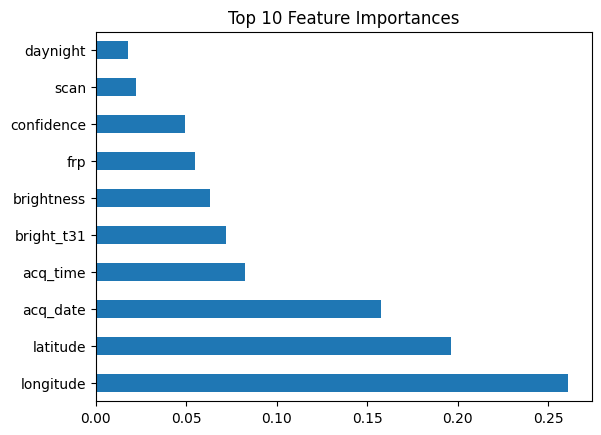

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load Dataset
df = pd.read_csv("/content/ddaefda0913b36051550.csv")

# Step 3: EDA
print("Missing Values:\n", df.isnull().sum())
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(df['brightness'], kde=True, bins=50)
plt.title("Brightness Distribution")
plt.show()

sns.countplot(data=df, x='daynight')
plt.title("Day vs Night")
plt.show()

sns.countplot(data=df, x='satellite')
plt.title("Satellite Count")
plt.show()

# Step 4: Encode Categorical Data
le = LabelEncoder()
df['satellite'] = le.fit_transform(df['satellite'])
df['instrument'] = le.fit_transform(df['instrument'])
df['daynight'] = le.fit_transform(df['daynight'])
df['acq_date'] = pd.to_datetime(df['acq_date'], errors='coerce').astype(int) / 10**9  # convert to timestamp
df.dropna(subset=['acq_date'], inplace=True) # Drop rows with NaT in acq_date

# Step 5: Feature/Target Split
# Drop rows with missing values in the target variable
df.dropna(subset=['type'], inplace=True)
X = df.drop("type", axis=1)  # 'type' as target (0 = vegetation/other, 1 = fire)
y = df["type"]


# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Prediction & Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Feature Importance
importances = pd.Series(model.feature_importances_, index=df.drop("type", axis=1).columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()